In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

# Задача 1

Сравнить показатели для больниц расположенных за городом и в городе.

Сравниваются расходы больницы за год (сотни долларов)(annual facilities expenditures)

In [79]:
nursing = pd.read_csv('./Nursing Home Data/Nursing Home Data_data', sep='\t')

Описание переменных:

* BED = число коек в больнице
* MCDAYS = annual medical in-patient days (hundreds)
* TDAYS = annual total patient days (hundreds)
* PCREV = получено от пациентов за год ( в сотнях долларов)
* NSAL = годовой оклад медсестры (в сотнях долларов)
* FEXP = расходы больницы за год (сотни долларов)
* RURAL = код типа больницы: загородная (код 1) или городская (код 0)

In [82]:
nursing.head()

,BED,MCDAYS,TDAYS,PCREV,NSAL,FEXP,RURAL
0,244,128,385,23521,5230,5334,0
1,59,155,203,9160,2459,493,1
2,120,281,392,21900,6304,6115,0
3,120,291,419,22354,6590,6346,0
4,120,238,363,17421,5362,6225,0


Разделим загородные больницы от городских

In [81]:
RURAL_0 = nursing[nursing.RURAL == 0]
RURAL_0.head()

,BED,MCDAYS,TDAYS,PCREV,NSAL,FEXP,RURAL
0,244,128,385,23521,5230,5334,0
2,120,281,392,21900,6304,6115,0
3,120,291,419,22354,6590,6346,0
4,120,238,363,17421,5362,6225,0
8,96,155,169,8812,1955,1260,0


In [83]:
RURAL_1 = nursing[nursing.RURAL == 1]
RURAL_1.head()

,BED,MCDAYS,TDAYS,PCREV,NSAL,FEXP,RURAL
1,59,155,203,9160,2459,493,1
5,65,180,234,10531,3622,449,1
6,120,306,372,22147,4406,4998,1
7,90,214,305,14025,4173,966,1
9,120,133,188,11729,3224,6442,1


In [84]:
RURAL_0.shape, RURAL_1.shape

((18, 7), (34, 7))

# Проверка нормальности распределения

Взглянем на гистограмму распределения 2 выборок

<AxesSubplot:>

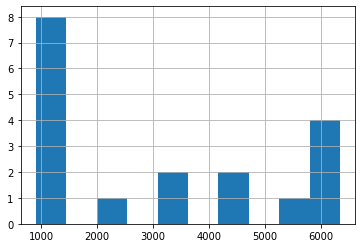

In [94]:
RURAL_0.FEXP.hist()

<AxesSubplot:>

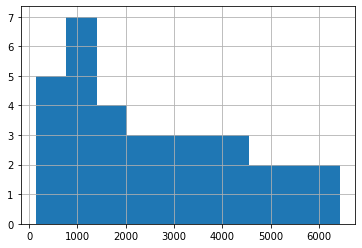

In [95]:
RURAL_1.FEXP.hist()

Распределения явно отличаются от нормального. Проверим нормальность на основании критерия Шапиро-Уилка.

In [96]:
res = stats.shapiro(RURAL_0.FEXP)
print('p-value: ', res[1])

p-value:  0.003969298675656319


In [97]:
res = stats.shapiro(RURAL_1.FEXP)
print('p-value: ', res[1])

p-value:  0.04017774015665054


Значение p-value меньше уровня значимости 0.05, поэтому гипотезу о нормальности распределений мы отвергаем.

# Сравнение медиан

Так как в выборках распределения не являются нормальными, мы можем воспользоваться сравнением их медиан

Отобразим выборки и их медиану на одном графике

In [106]:
def two_histograms(x, y):
    """
    Функция, которая построит две гистограммы на одной картинке.
    Дополнительно пунктирными линиями указываются средние значения выборок.
    x: вектор pd.Series,
    y: вектор pd.Series
    """
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(x.median(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.median(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

In [107]:
x = RURAL_0.FEXP
y = RURAL_1.FEXP
x.name, y.name = 'city', 'out of city'

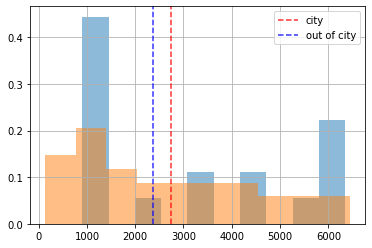

In [108]:
two_histograms(x, y)

Так как распределение не является нормальным, а наблюдения независимыми, мы можем применить только критерий Манна-Уитни.

In [105]:
res = stats.mannwhitneyu(x, y)
print('p-value:', res[1])

p-value: 0.26594759448891914


# Вывод

p-value получилось больше значения критерия значимости, поэтому у нас нет оснований отвергнуть гипотезу о том, что годовые расходы больниц, расположенных в городе и за его пределами, значительно различаются. 

Вывод: годовые расходы больниц различаются незначимо -- разница медиан в выборках вызвана случайными отклонениями.

# Задача 2

Сравнить процент муниципальных служащих, состоящих в профсоюзах в 1982 в
разных штатах США. Сравниваются штаты, отличающиеся по тому, принят ли в
этих штатах соответствующий закон (код 1) или не принят (код 0)

Сравниваются штаты, в которых принят закон State right-to-work law
и те, в которых закон не принят.

In [4]:
labor_law = pd.read_csv('./Unions and State Labor Law/Unions and State Labor Law_data', sep='\t')

Имена переменных:
* STATE: Штат.
* DENS: Процент работников государственного сектора в профсоюзах, 1982 г.
* COMP: Законы штата о ведении переговоров распространяются на государственных служащих (1) или нет (0)
* RTW: Закон о праве на труд принят в штате (1) или нет (0)
* PVT: Процент работников частного сектора в профсоюзах, 1982 г.

In [5]:
labor_law.head()

,STATE,DENS,COMP,RTW,PVT
0,NY,56.9,1,0,31.2
1,MI,49.6,1,0,30.2
2,WA,32.4,1,0,33.1
3,HI,54.6,1,0,24.7
4,AK,30.7,1,0,30.1


In [6]:
labor_law.shape

(50, 5)

Разделим выборку на наблюдения где закон о праве на труд принят или нет

In [30]:
RTW_0 = labor_law[labor_law.RTW == 0]
RTW_0.head()

,STATE,DENS,COMP,RTW,PVT
0,NY,56.9,1,0,31.2
1,MI,49.6,1,0,30.2
2,WA,32.4,1,0,33.1
3,HI,54.6,1,0,24.7
4,AK,30.7,1,0,30.1


In [31]:
RTW_1 = labor_law[labor_law.RTW == 1]
RTW_1.head()

,STATE,DENS,COMP,RTW,PVT
15,NV,38.0,0,1,19.4
17,IO,35.0,1,1,16.9
26,AL,32.4,0,1,14.2
28,TN,33.0,0,1,14.0
29,UT,42.3,0,1,9.4


In [32]:
RTW_0.shape, RTW_1.shape

((30, 5), (20, 5))

# Проверка нормальности распределения

Взглянем на гистограмму распределения 2 выборок

<AxesSubplot:>

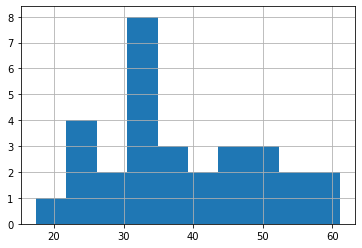

In [33]:
RTW_0.DENS.hist()

<AxesSubplot:>

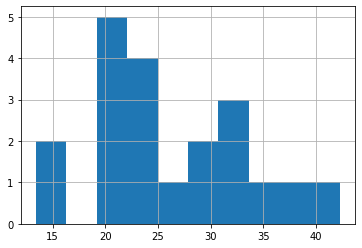

In [11]:
RTW_1.DENS.hist()

Сложно определить нормальность распеределения, явных выбросов нет. Проверим нормальность на основании критерия Шапиро-Уилка.

In [12]:
res = stats.shapiro(RTW_1.DENS)
print('p-value: ', res[1])

p-value:  0.6463996171951294


In [13]:
res = stats.shapiro(RTW_0.DENS)
print('p-value: ', res[1])

p-value:  0.19173066318035126


P-value > 0.05, следовательно, мы не может отвергнуть гипотезу, что выборки имеют нормальное распределение.

Оба критерия показывают, что распределение процента муниципальных служащих при принятии закона является нормальным.

# Сравнение средних

Так как в выборках распределения являются нормальными, мы можем воспользоваться сравнением средних

Отобразим выборки и их среднее на одном графике

In [109]:
x = labor_law[labor_law['RTW'] == 0]['DENS']
y = labor_law[labor_law['RTW'] == 1]['DENS']
x.name, y.name = 'dismissed', 'accepted'

In [110]:
def two_histograms(x, y):
    """
    Функция, которая построит две гистограммы на одной картинке.
    Дополнительно пунктирными линиями указываются средние значения выборок.
    x: вектор pd.Series,
    y: вектор pd.Series
    """
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

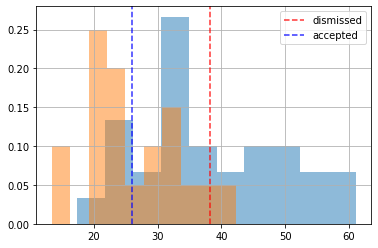

In [111]:
two_histograms(x, y)

Критерием Флигнера-Килина проверим, равны ли дисперсии.

In [34]:
res = stats.fligner(x, y)
print('p-value: ', res[1])

p-value:  0.12569758439648204


Значение p-value больше уровня значимости 0.05, поэтому гипотезу о равенстве дисперсий не отвергаем. В двух выборках находятся разные  объекты, значит выборки независимые. Вывод: гипотезу о равенстве средних значений будем проверять с помощью ```ttest_ind``` с опцией ```equal_var=True```.

In [35]:
res = stats.ttest_ind(x, y, equal_var=True)
print('p-value: ', res[1])

p-value:  9.287017631717846e-05


Значение p-value меньше уровня значимости 0.05, поэтому гипотезу о равенстве средних отвергаем.

# Вывод

Процент муниципальных служащих статистически значимо отличается между штатами, где был принят закон  о праве на труд или нет. 